NameError: name 'pd' is not defined

In [1]:
from PIL import Image
import librosa
import os
import librosa.display
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense,BatchNormalization
from keras.utils.vis_utils import plot_model
import keras

In [24]:
print("Hello world")

Hello world


In [43]:
df = pd.read_csv("D:/8th-sem/Major-Project/Dataset/Raw/TAU-urban-acoustic-scenes-2020-mobile-development/meta.csv")
print(df.iloc[0])
y, sr = librosa.load("D:/8th-sem/Major-Project/Dataset/Raw/TAU-urban-acoustic-scenes-2020-mobile-development/audio/"+df.iloc[[0]])
plt.plot(y);
plt.title('Signal');
plt.xlabel('Time (samples)');
plt.ylabel('Amplitude');

filename\tscene_label\tidentifier\tsource_label    audio/airport-lisbon-1000-40000-a.wav\tairport...
Name: 0, dtype: object


TypeError: Invalid file:      filename\tscene_label\tidentifier\tsource_label
0  D:/8th-sem/Major-Project/Dataset/Raw/TAU-urban...

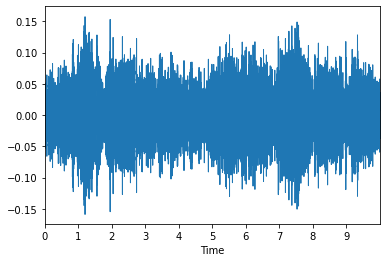

In [26]:
y, _ = librosa.effects.trim(y)
librosa.display.waveplot(y, sr=sr);


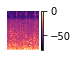

In [10]:
plt.interactive(False)
fig = plt.figure(figsize=[0.72,0.72])
ax = fig.add_subplot(111)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_frame_on(False)

S = librosa.feature.melspectrogram(y, sr=sr, n_fft=2048, hop_length=512, n_mels=128)
S_DB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_DB, sr=sr, hop_length=512, x_axis='time', y_axis='mel');
plt.colorbar();
# filename  = Path('D:\8th-sem\Major-Project\Dataset\img' + "name" + '.jpg')
plt.savefig("filename.jpg",dpi=400, bbox_inches='tight',pad_inches=0)

In [9]:
# TO GENERATE SPECTROGRAMS 
def generate_spectrogram(audioFile):
    y, sr = librosa.load("D:/8th-sem/Major-Project/Dataset/Raw/TAU-urban-acoustic-scenes-2020-mobile-development/"+audioFile[0]+'/'+audioFile[1])
    y, _ = librosa.effects.trim(y)
    plt.interactive(False)
    # clip, sample_rate = librosa.load(filename, sr=None)
    fig = plt.figure(figsize=[0.72,0.72])
    ax = fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
    S = librosa.feature.melspectrogram(y=y, sr=sr)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max))
    plt.savefig("D:/8th-sem/Major-Project/Dataset/img/"+audioFile[1].split('.')[0], dpi=400, bbox_inches='tight',pad_inches=0)
    plt.close()    
    fig.clf()
    plt.close(fig)
    plt.close('all')

In [25]:
df = pd.read_csv("D:/8th-sem/Major-Project/Dataset/Raw/TAU-urban-acoustic-scenes-2020-mobile-development/new_meta.csv")
# df.iloc[100][0].split('.')[0]
df.iloc[6983]

FILE      audio/park-lyon-1060-44018-s3.wav
CLASS                                  park
PLACE                             lyon-1060
DEVICE                                   s3
Name: 6983, dtype: object

for i in range (4175,5554):
    generate_spectrogram(df.iloc[i][0].split('/'))

In [27]:
for i in range (5555,6983): 
    generate_spectrogram(df.iloc[i][0].split('/'))

In [7]:
model = Sequential()
#Block -1
model.add(Conv2D(64, (3, 3), input_shape=(223, 217, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2)))

#Block -2
model.add(Conv2D(128, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2)))

# model.add(Dense(1000,activation='softmax'))

#Block -3
model.add(Conv2D(256, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2)))

#Block -4 
model.add(Conv2D(512, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(1, 1)))

model.add(AveragePooling2D(pool_size=(20, 1)))
model.add(MaxPooling2D(pool_size=(1, 19)))
model.add(Flatten())
model.add(Dense(512, activation='linear'))
model.add(Dense(3,activation='softmax'))

# model.compile(optimizer='Adam',metrics=['accuracy'])
model.summary()




Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 221, 215, 64)      640       
_________________________________________________________________
batch_normalization (BatchNo (None, 221, 215, 64)      256       
_________________________________________________________________
activation (Activation)      (None, 221, 215, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 219, 213, 64)      36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 219, 213, 64)      256       
_________________________________________________________________
activation_1 (Activation)    (None, 219, 213, 64)      0         
_________________________________________________________________
average_pooling2d (AveragePo (None, 109, 106, 64)      0

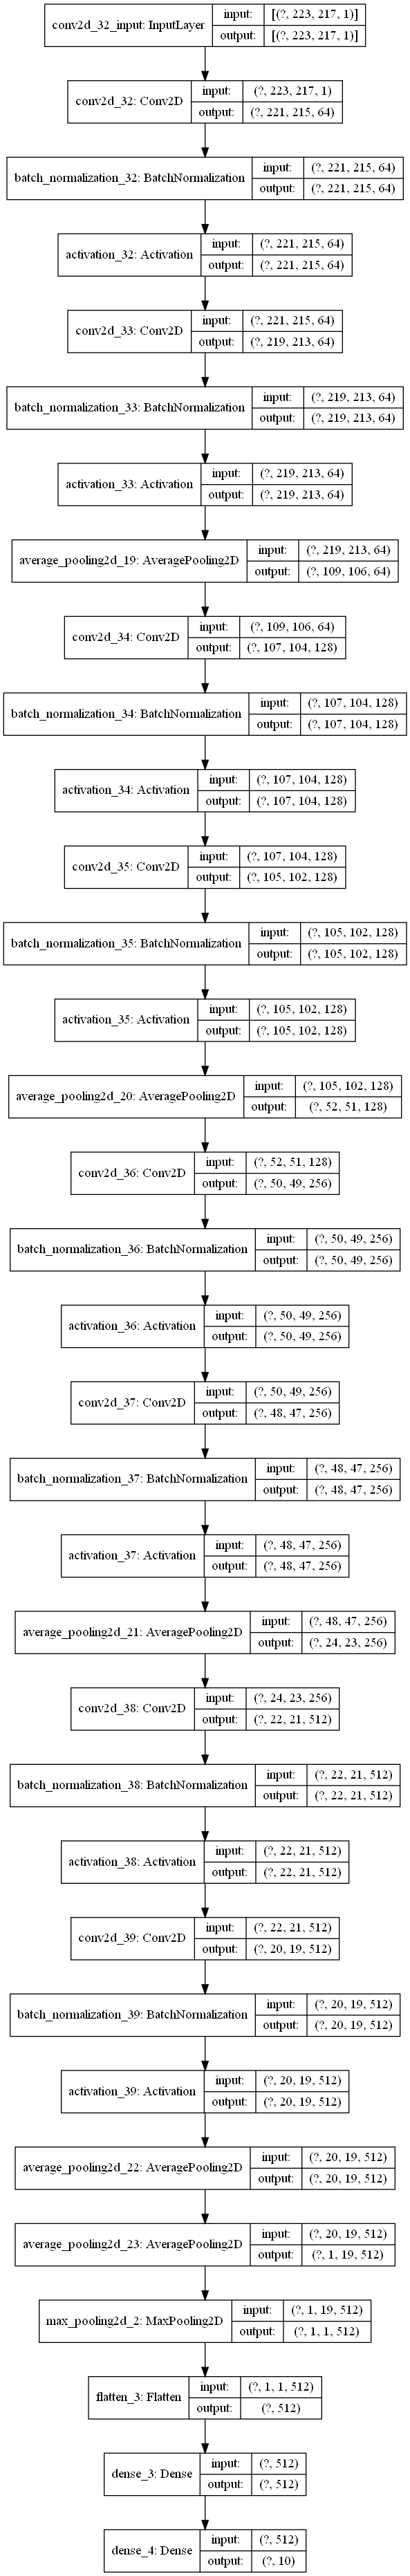

In [8]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True,rankdir="TB")

In [69]:
img_data_csv = pd.read_csv('D:/8th-sem/Major-Project/Dataset/Metas/new_meta_csv.csv')
img_data_csv.head(5)

,filename,Target,na,2na
0,airport-lisbon-1000-40000-a.png,0,lisbon-1000,a
1,airport-prague-1015-40019-a.png,0,prague-1015,a
2,airport-prague-1023-40027-a.png,0,prague-1023,a
3,airport-prague-1023-40038-a.png,0,prague-1023,a
4,airport-prague-1034-40041-a.png,0,prague-1034,a


In [70]:
img_data_csv.shape


(23035, 4)

In [29]:
def grey_scale(img_folder):
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
            image_path= os.path.join(img_folder, dir1,  file)
#             print(image_path)
            img = Image.open(image_path).convert('LA')
            img.save('D:/8th-sem/Major-Project/Dataset/img/3/'+file, 'PNG')
            

# img = Image.open('D:/8th-sem/Major-Project/Dataset/img/0/airport-barcelona-0-0-a.png').convert('LA')
# img.save('D:/8th-sem/Major-Project/Dataset/img/'+'greyscale.png')
# img.save('D:/8th-sem/Major-Project/Dataset/img/greyscale.png', 'PNG')
grey_scale('D:/8th-sem/Major-Project/Dataset/img')

In [3]:
def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
            image_path= os.path.join(img_folder, dir1,  file)
#             img = Image.open(image_path).convert('LA')
#             img.save('greyscale.png')
#             print(file)
            image= cv2.imread( image_path, 0)
#             image=cv2.resize(image, (223, 217),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name
# extract the image array and class name
img_data, class_name =create_dataset('D:/8th-sem/Major-Project/Dataset/img')

In [95]:
class_name[3000]

'2'

In [5]:
X_train = img_data
Y_train = class_name
X_train = np.array([x.reshape( (223, 217, 1) ) for x in X_train])
Y_train = np.array(keras.utils.to_categorical(Y_train, 3))

In [8]:
model.compile(
    optimizer="Adam",
    loss="categorical_crossentropy",
    metrics=['accuracy'])
model.fit(
    x=X_train, 
    y=Y_train,
    epochs=3,
    batch_size=10)

Epoch 1/3
102/556 [====>.........................] - ETA: 30:08 - loss: 1.0557 - accuracy: 0.5471

KeyboardInterrupt: 

In [9]:
y_actu = np.random.randint(0,1,size=460)
y_actu = y_actu.append(np.random.randint(1,2,size=460))
y_actu = y_actu.append(np.random.randint(2,3,size=460))
y_actu = y_actu.append(np.random.randint(3,4,size=460))
y_actu = y_actu.append(np.random.randint(4,5,size=460))
y_actu = y_actu.append(np.random.randint(5,6,size=460))
y_actu = y_actu.append(np.random.randint(6,7,size=460))
y_actu = y_actu.append(np.random.randint(7,8,size=460))
y_actu = y_actu.append(np.random.randint(8,9,size=460))
y_actu = y_actu.append(np.random.randint(9,10,size=460))

y_pred = np.random.randint(0,10,size=4608)
df_confusion = pd.crosstab(y_actu, y_pred)
print(df_confusion)

AttributeError: 'numpy.ndarray' object has no attribute 'append'